In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# imageurl = './traffic-lights-night-8395.jpg'
# imageurl = './traffic-lights-nigha5.jpg'
imageurl = './rose.jpeg'
image = cv2.cvtColor(cv2.resize(cv2.imread(imageurl), (140*2,100*2)),cv2.COLOR_BGR2GRAY)

In [3]:
def plot_masked(image, mask, ret = False):
    mask = np.array(mask)
    new_image = []
    for i in range(1,image.shape[0]-1):
        new_image.append([])
        for j in range(1,image.shape[1]-1):
            mm = np.reshape(mask,(9,))
            tt = np.reshape(image[i-1:i+2,j-1:j+2],(9,))
    #         print(mm, tt)
            value = np.dot(mm, tt)
    #         print(value,end="\t")
            new_image[-1].append(value)
    new_image = np.array(new_image)
    
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (12,4))
    ax1.imshow(image)
    ax2.imshow(new_image)
    plt.show()
    
    if ret:
        return new_image

## Sharpen


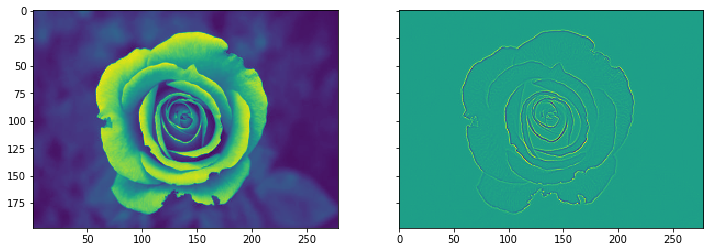

In [4]:
# basically gaussian
plot_masked(image, mask = [[0,1,0],[1,-4,1],[0,1,0]])

## Laplacian

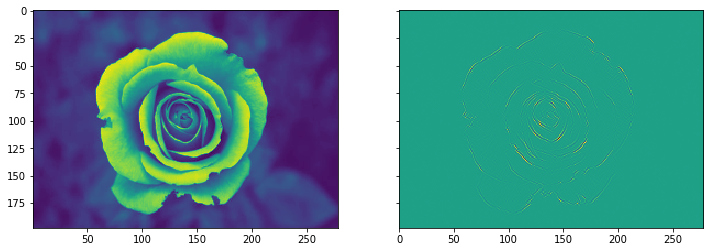

In [5]:
# laplcian of gaussian
plot_masked(image, mask = [[-1,2,-1],[2,-4,2],[-1,2,-1]])

## Blur



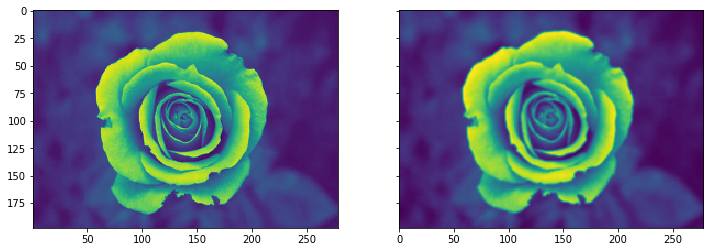

In [6]:
# gaussian blur
plot_masked(image, mask = [[1,2,1],[2,4,2],[1,2,1]])

## Sobel
### Derivative of Gaussian

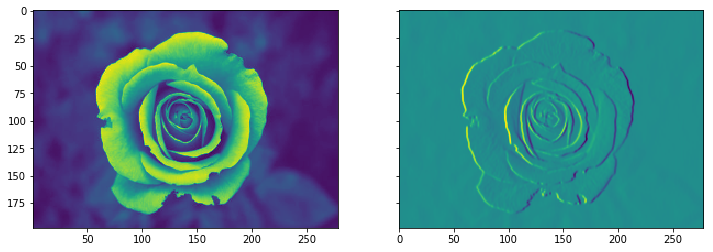

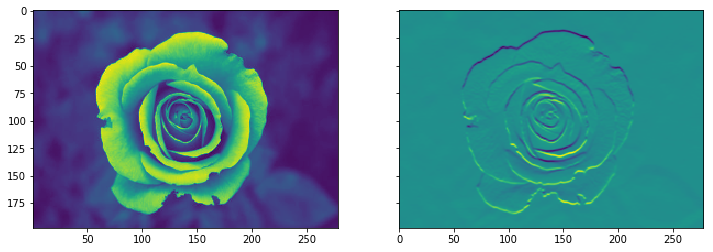

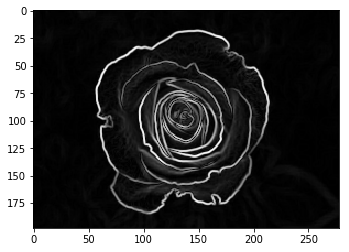

In [7]:
sx = plot_masked(image, mask = 1/8 * np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]]), ret=True)
sy = plot_masked(image, mask = 1/8 * np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]]), ret = True)

plt.imshow(-np.sqrt((sx**2)+(sy**2)), cmap='Greys')
plt.show()

## Prewit Edge Detector

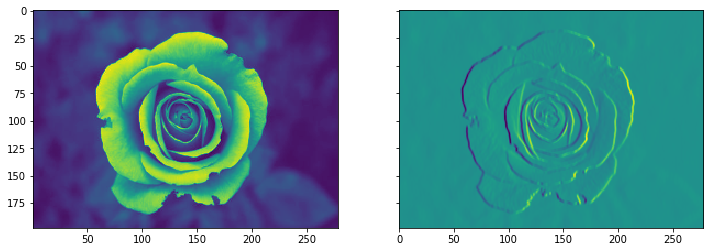

In [8]:
plot_masked(image, [[1,0,-1],[1,0,-1],[1,0,-1]])